[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/KingaS03/Introduction-to-Python-2020-June/master)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/KingaS03/Introduction-to-Python-2020-June)

# 1. Introduction to the Mathematics Module for ML and DS

We are going to consider a common machine learning context, as this is illustrating all the major components of our course.

## 1.1. Machine learning versus classical programming
First let's take a look at machine learning and compare it with classical programming.

------------------------------------
*Machine Learning is the "field of study that gives computers the ability to learn without being explicitly programmed."* - Arthur Samuel, 1959

-------------------------------------

<center>
<img src="Images/TraditionalProgr.png" width="300"> 
</center>

versus

<center>
<img src="Images/MachineLearning0.png" width="300"> 
</center>

In case of some machine learning problems the resulting rules can be conceived as a model, which for any input data is able to predict the associated output. 

<center>
<img src="Images/MachineLearning1.png" width="300"> 
</center>

Mathematically we can think of this model as a function that assigns to an input value a predicted output value and at the same time it depends also on some model parameters (weights and intercept). The model parameters are determined in such a way to minimise the loss function. This phenomenon is concisely described in the following quote:

-----------
*"A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E."* - Tom Mitchell, 1997

---------------

## 1.2. Simple machine learning setting - Linear regression
One of the simplest settings of a machine learning algorithm is the linear regression. To get a quick intuition about how it works play with the below interactive graph. You can change the position of the blue datapoints by dragging them with the mouse. You can change the position of the red line by moving the two red points of it.

What happens on the plot on the right hand side if you change the position of one of the red points? How can you explain the observed behaviou?

Take a look at the blue end red values in the upper right corner. How do these values change?

What is the starting point of a regression analysis and what is its objective?

In [2]:
from IPython.display import IFrame

#IFrame("https://www.geogebra.org/m/xC6zq7Zv",800,800)
IFrame("https://www.geogebra.org/classic/gvtvpem2", 1400, 600)

Let's take a look at a concrete numerical example:

We would like to predict the price of apartments as a linear function of their surface.

We consider the following data points:
    
| Surface area in $m^2$ | Price in tausends of CHF | 
| --- | --- |
| 40| 275| 
| 70 | 500 | 
| 80 | 470 | 
| 100 | 650 | 
| 115 | 690 | 
| 120 | 750 | 

The surface area, denoted by $x$, is the single **explanatory/dependent variable**. 

The price, denoted by $y$, is the single **independent variable**.

The apartments, whose prices are enlisted in the above table are called **observations** and we will refer to their **features** (surface and price) as $x_i$, respectively $y_i$, where $i$ is the index of the apartment ($i = \overline{0,5}$).

We would like to approximate our data points by a line defined by the equation
$$ y = w\cdot x + b,$$
where $w$ is called **weight/gradient** and $b$ is called **intercept**. These parameters $w$ and $b$ are determined in such a way that the mean squared error of the approximations is minimal.

For our set of apartments the **$MSE$ (mean squared error)** can be calculated as follows:
$$\begin{align*}
MSE &= \frac{1}{6}\sum_{i=0}^5 \left(y_i - (w \cdot x_i + b)\right)^2\\
& = \frac{1}{6}\left(\left(275-(w\cdot 40 + b)\right)^2 + \left(500-(w\cdot 70 + b)\right)^2 + \left(470-(w\cdot 80 + b)\right)^2 + \left(650-(w\cdot 100 + b)\right)^2 + \left(690-(w\cdot 115 + b)\right)^2 + \left(750-(w\cdot 120 + b)\right)^2\right)
\end{align*}$$

$MSE$ is a function of the parameters $b$ and $w$.

The goal is to determine the parameters $b$ and $w$ in such a way to obtain the minimal $MSE$.

Experiment with the following code. Fit the red line to the data points by trying out different values for the parameters $w$ and $b$.

Text(0, 0.5, 'Price (tausend CHF)')

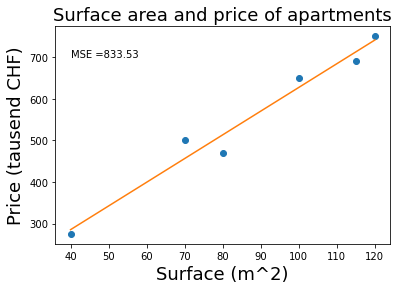

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 300 random samples
x = np.array([40, 70, 80, 100, 115, 120])
y = np.array([275, 500, 470, 650, 690, 750])

plt.plot(x, y, 'o') #scatter plot of data points

w, b = np.polyfit(x, y, 1)

plt.plot(x, b + w*x) #add line of best fit

MSE = np.mean((y-(b + w*x))**2)

# legend, title, and labels.
plt.text(40,700, f"MSE ={MSE:.2f}")
plt.title('Surface area and price of apartments', size=18)
plt.xlabel('Surface (m^2)', size=18)
plt.ylabel('Price (tausend CHF)', size=18)

Compare your values with the optimal ones, by running the code<br> 
`w, b = np.polyfit(x, y, 1)`.

Due to the simplicity of the linear model, it is possible to derive the explicit formulas for the parameters by calculating the partial derivatives of the $MSE$ w.r.t. the parameters and setting the values of these to $0$. Without detailed explanation 
$$\frac{\partial MSE}{\partial w} = 0, \quad \frac{\partial MSE}{\partial b} = 0$$
one can conclude:
$$\left\{\begin{align*}
w &= \frac{\sum\limits_i (x_i - \overline{x})\cdot (y_i-\overline{y})}{\sum\limits_i(x_i - \overline{x})^2} = 5.70\\
b &= \overline{y}-w\cdot \overline{x} = 57.30
\end{align*}\right.
$$
where $\overline{x} = \frac{\sum_i x_i}{n}$ and $\overline{y} = \frac{\sum_i y_i}{n}$


## 1.3. Neuronal networks
The above univariate linear regression model can be presented as

<center>
<img src="Images/Network0.png" width="300"> 
</center>

For the future notation we leave away the virtual input of 1.

Now we make the model more complex until we get to the a two-layer neuronal network. First we apply an activation function $g$ to the linear transformation $b+w \cdot x$.

<center>
<img src="Images/Network1.png" width="320"> 
</center>

The above red ball corresponds to the smallest building unit of a neuronal network, namely a neuron. In a neuron:
- there happens a linear transformation
- to which an activation function is applied and this provides the output of the neuron.

Next we allow for more inputs. 
<center>
<img src="Images/MultiNetwork00.png" width="320"> 
</center>

Finally we allow also for more outputs and we have two hidden layers. 
<center>
<img src="Images/MultiNetwork2.png" width="500"> 
</center>

The number of hidden layers indicates that the last neuronal network is a two-layer neuronal network.


## 1.4. Motivation

Exactly as in the case of linear regression the weight matrices $W^{(1)}$, $W^{(2)}$, respectively the intercepts $b^{(1)}$ and $b^{2}$ will be parameters of the loss function which is subject to minimisation. In the general case there is no immediate straightforward formula for the optimal parameters. 
<center>
The minimum of the loss function can be approximated by the **gradient descent** method. 
    $$\hspace{-2cm}\Uparrow$$
For the gradient descent method we should be able to derive the **partial derivatives** of the outputs w.r.t. all parameters of the model.
    $$\hspace{-2cm}\Uparrow$$
For neuronal networks with more hidden layers and differentiable activation functions these partial derivatives can be deremined by the **chain rule**.
$$\hspace{-2cm}\Uparrow$$
To apply the chain rule for a setting like in the last network, one needs to perform **matrix multiplications**.
</center>

The number of machine learning algorithms is large. That's why generally a huge amount of input data is needed to determine the model parameters. Alternatively, if we don't possess that much data, we can reduce the dimensionality of the input data (and by that we end up also with a smaller number of model parameters). For dimensionality reduction we can use the **PCA (principal component analysis)**, which is the same as singular value decomposition. The first name is used more in the circle of statisticians and the second name is more popular among theoretical mathematicians. To derive PCA, we need the notion of **orthogonal projection**, **eigenvalues and eigenvectors**, **the method of Lagrange multipliers** and some **descriptive statistics**.

Furthermore, when the output of a neuronal network is a distribution, **probability theory** will be needed also to measure the distance between the observed distribution and the predicted one.

## 1.5. Schedule
-Linear algebra
 - vector operations
     - vector addition, 
     - vector substraction, 
     - multiplication of a vector by a scalar
     - the dot product
 - matrix operations
     - matrix addition
     - matrix substraction
     - multiplication of a matrix by a scalar
     - matrix multiplication
     - inverse of a square matrix
 - projection and the dot product
 - orthogonal matrices
 - change of basis
 - eigenvalues and eigenvectors of matrices
 
-Calculus

-PCA

-Probability theory and statistics